In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling2D, Conv2D, Dropout
from keras.datasets import mnist
from keras.layers import Flatten
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# step 1 - get data

(x_train, y_train), (x_test, y_test) = mnist.load_data(0.2)

TypeError: load_data() got an unexpected keyword argument 'split'

In [26]:
x_train.shape
x_test.shape

(60000, 784)

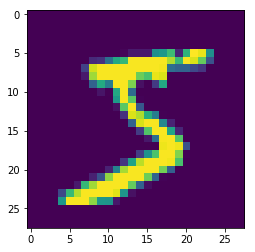

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0]

5

In [16]:
# normalize and reshape your data

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [17]:
x_train.shape

(60000, 784)

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [19]:
# convert y to one hot vectors

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [29]:
# build model

model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, verbose=1, epochs=20, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 2.3015 - acc: 0.1118       

In [22]:
score = model.evaluate(x_test, y_test)

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 100000 target samples.

# CNN

In [31]:
(xc_train, yc_train), (xc_test, yc_test) = mnist.load_data()

In [32]:
xc_train.shape

(60000, 28, 28)

In [33]:
# reshape your input data

xc_train = xc_train.reshape(60000, 28, 28, 1)
xc_test = xc_test.reshape(xc_test.shape[0], 28, 28, 1)

xc_train = xc_train.astype('float32')
xc_test = xc_test.astype('float32')

xc_train /= 255
xc_test /= 255

In [34]:
xc_train.shape

(60000, 28, 28, 1)

In [37]:
# change y to one hot encoding

yc_train = keras.utils.to_categorical(yc_train, 10)
yc_test = keras.utils.to_categorical(yc_test, 10)

In [36]:
yc_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [39]:
# build your model

cmodel = Sequential()

cmodel.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
cmodel.add(Activation('relu'))
cmodel.add(MaxPooling2D((2,2)))
cmodel.add(Dropout(0.2))

cmodel.add(Conv2D(64, kernel_size=(3,3)))
cmodel.add(Activation('relu'))
cmodel.add(MaxPooling2D((2,2)))
cmodel.add(Dropout(0.2))

cmodel.add(Flatten())
cmodel.add(Dense(128, activation='relu'))
cmodel.add(Dense(128, activation='relu'))
cmodel.add(Dense(10, activation='softmax'))

In [41]:
cmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [42]:
cmodel.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
cmodel.fit(xc_train, yc_train, epochs=10, batch_size=128, verbose=1)

score = cmodel.evaluate(xc_test, yc_test)